In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv


In [2]:
# load the data
path = "/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv"
df = pd.read_csv(path)

In [3]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
categorical_cols = ['FAVC']
numeric_cols = ['Height', 'Weight']
X=df[['Height','Weight', 'FAVC']]
y=df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train


,Height,Weight,FAVC
1080,1.700000,78.000000,yes
1204,1.663178,80.135167,yes
1737,1.848420,117.631707,yes
1548,1.766975,118.363376,yes
2046,1.626179,110.074019,yes
...,...,...,...
1638,1.754956,120.098812,yes
1095,1.718981,81.669950,yes
1130,1.650000,80.000000,yes
1294,1.628168,84.497980,yes


In [4]:
X_test

,Height,Weight,FAVC
544,1.755978,53.699561,yes
1987,1.624950,111.004920,yes
420,1.850000,60.000000,yes
527,1.520000,42.000000,yes
196,1.750000,74.000000,no
...,...,...,...
331,1.740000,56.000000,yes
194,1.600000,83.000000,yes
322,1.750000,56.000000,no
266,1.650000,50.000000,yes


In [5]:
from sklearn.impute import SimpleImputer

# Handle Missing data in numerical and categorical columns
X_train_categorical = X_train[categorical_cols]
X_train_numeric = X_train[numeric_cols]
X_test_categorical = X_test[categorical_cols]
X_test_numeric = X_test[numeric_cols]

# Using transform on the test data to apply the same transformation learned from the training set
imputer1 = SimpleImputer(strategy='constant', fill_value='missing')
X_train_imputed = imputer1.fit_transform(X_train_categorical)
X_test_imputed = imputer1.transform(X_test_categorical)

imputer2 = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_imp_mean_imputed = imputer2.fit_transform(X_train_numeric)
X_test_imp_mean_imputed = imputer2.transform(X_test_numeric)


In [6]:
# Converting imputed numerical cols into a dataframe
imputed_df_1 = pd.DataFrame(
    X_train_imp_mean_imputed,
    columns=imputer2.get_feature_names_out(numeric_cols)
)

imputed_df_2 = pd.DataFrame(
    X_test_imp_mean_imputed,
    columns=imputer2.get_feature_names_out(numeric_cols)
)

In [7]:
imputed_df_1

,Height,Weight
0,1.700000,78.000000
1,1.663178,80.135167
2,1.848420,117.631707
3,1.766975,118.363376
4,1.626179,110.074019
...,...,...
1578,1.754956,120.098812
1579,1.718981,81.669950
1580,1.650000,80.000000
1581,1.628168,84.497980


In [8]:
imputed_df_2

,Height,Weight
0,1.755978,53.699561
1,1.624950,111.004920
2,1.850000,60.000000
3,1.520000,42.000000
4,1.750000,74.000000
...,...,...
523,1.740000,56.000000
524,1.600000,83.000000
525,1.750000,56.000000
526,1.650000,50.000000


In [9]:
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=categorical_cols)
X_train_imputed_df

,FAVC
0,yes
1,yes
2,yes
3,yes
4,yes
...,...
1578,yes
1579,yes
1580,yes
1581,yes


In [10]:
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=categorical_cols)
X_test_imputed_df

,FAVC
0,yes
1,yes
2,yes
3,yes
4,no
...,...
523,yes
524,yes
525,no
526,yes


In [11]:
df["FAVC"].value_counts()

FAVC
yes    1866
no      245
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Encoding categorical data using label encoding
FAVC_dict = {"no": 0, "yes": 1}
X_train_imputed_df["FAVC"] = X_train_imputed_df["FAVC"].apply(lambda x: FAVC_dict[x])
X_test_imputed_df["FAVC"] = X_test_imputed_df["FAVC"].apply(lambda x: FAVC_dict[x])

In [13]:
# Combine numerical and categorical cols into a new dataFrame
X_train_concatenated_df = pd.concat([imputed_df_1, X_train_imputed_df], axis=1)
X_test_concatenated_df = pd.concat([imputed_df_2, X_test_imputed_df], axis=1)

In [14]:
X_train_concatenated_df

,Height,Weight,FAVC
0,1.700000,78.000000,1
1,1.663178,80.135167,1
2,1.848420,117.631707,1
3,1.766975,118.363376,1
4,1.626179,110.074019,1
...,...,...,...
1578,1.754956,120.098812,1
1579,1.718981,81.669950,1
1580,1.650000,80.000000,1
1581,1.628168,84.497980,1


In [15]:
X_test_concatenated_df

,Height,Weight,FAVC
0,1.755978,53.699561,1
1,1.624950,111.004920,1
2,1.850000,60.000000,1
3,1.520000,42.000000,1
4,1.750000,74.000000,0
...,...,...,...
523,1.740000,56.000000,1
524,1.600000,83.000000,1
525,1.750000,56.000000,0
526,1.650000,50.000000,1


In [16]:
df["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [17]:
# y_train.isnull().value_counts()
NObeyesdad_dict = {"Insufficient_Weight": 0, "Normal_Weight": 1, "Overweight_Level_I": 2, "Overweight_Level_II": 3, "Obesity_Type_I": 4, "Obesity_Type_II": 5, "Obesity_Type_III": 6}
y_train_encoded = y_train.apply(lambda x: NObeyesdad_dict[x])
y_test_encoded = y_test.apply(lambda x: NObeyesdad_dict[x])

In [18]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
model = clf.fit(X_train_concatenated_df,y_train_encoded)
#Predict the response for test dataset
y_pred = model.predict(X_test_concatenated_df)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_encoded, y_pred))

Accuracy: 0.9507575757575758


/tmp/ipykernel_19/1881224563.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


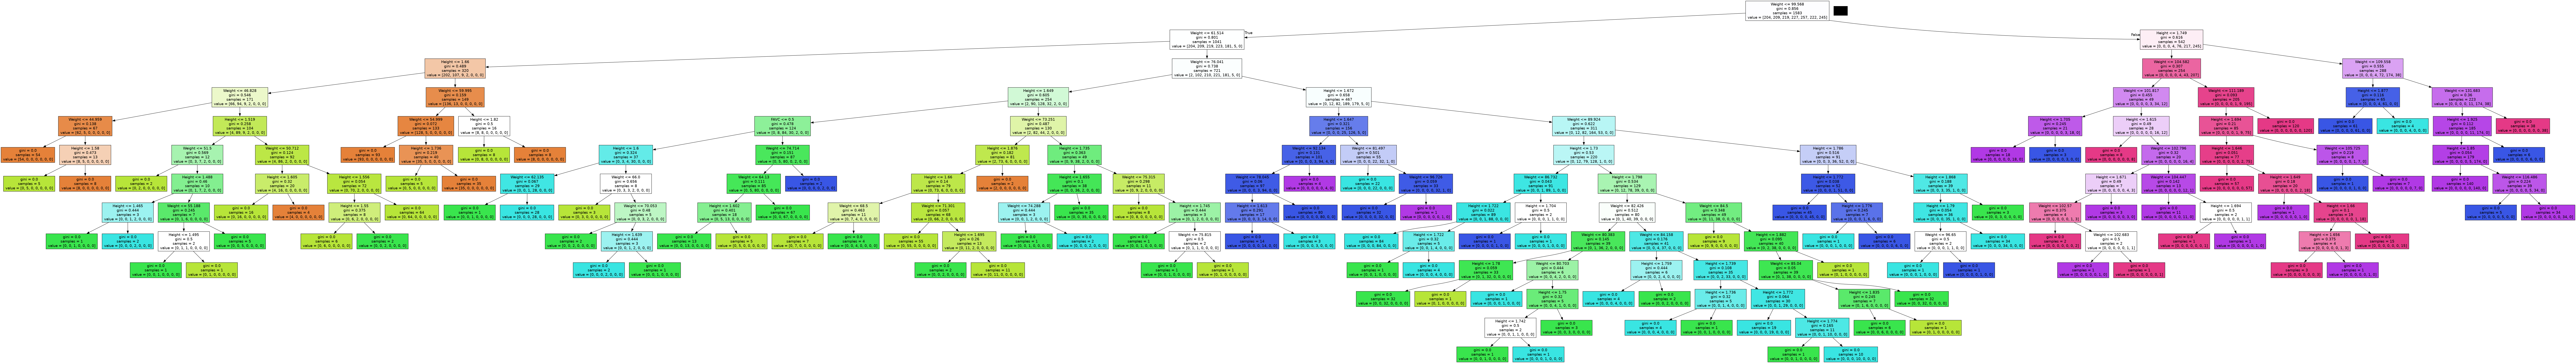

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

graph, = print_tree(clf, features=X.columns)
Image(graph.create_png())

In [20]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [21]:
# Depth of the tree
print(clf.tree_.max_depth)

12


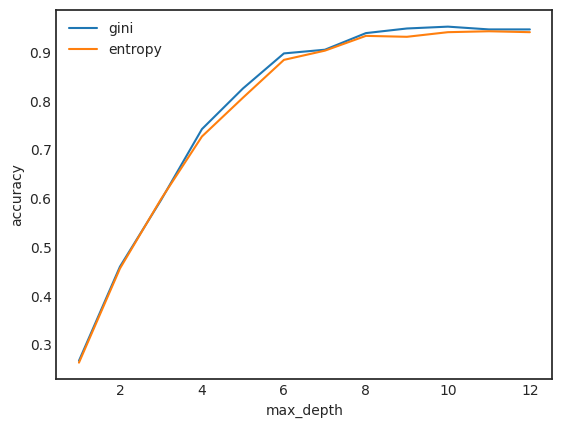

In [22]:
# optimization part - parametric optimization
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,clf.tree_.max_depth + 1):
 dtree = DecisionTreeClassifier(criterion='gini',max_depth=i)
 dtree.fit(X_train_concatenated_df,y_train_encoded)
 pred = dtree.predict(X_test_concatenated_df)
 acc_gini.append(metrics.accuracy_score(y_test_encoded, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train_concatenated_df,y_train_encoded)
 pred = dtree.predict(X_test_concatenated_df)
 acc_entropy.append(metrics.accuracy_score(y_test_encoded, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

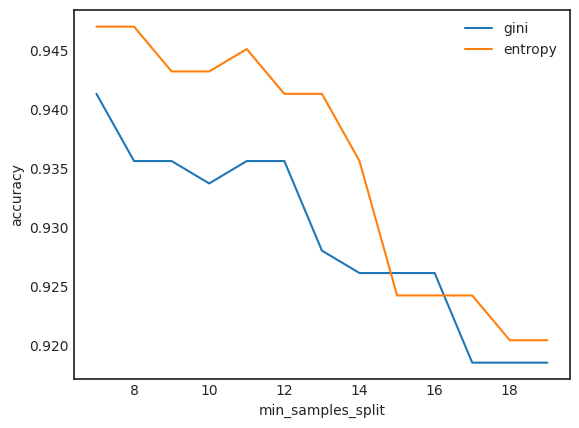

In [23]:
min_samples_split = []
acc_gini = []
acc_entropy = []
for i in range(7,20,1):
 dtree = DecisionTreeClassifier(criterion='gini',min_samples_split=i )
 dtree.fit(X_train_concatenated_df,y_train_encoded)
 pred = dtree.predict(X_test_concatenated_df)
 acc_gini.append(metrics.accuracy_score(y_test_encoded, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', min_samples_split=i )
 dtree.fit(X_train_concatenated_df,y_train_encoded)
 pred = dtree.predict(X_test_concatenated_df)
 acc_entropy.append(metrics.accuracy_score(y_test_encoded, pred))
 ####
 min_samples_split.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'min_samples_split':pd.Series(min_samples_split)})
# visualizing changes in parameters
plt.plot('min_samples_split','acc_gini', data=d, label='gini')
plt.plot('min_samples_split','acc_entropy', data=d, label='entropy')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.legend()

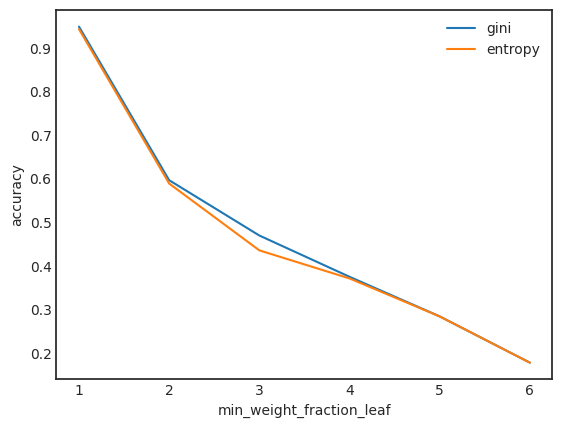

In [24]:
fractions = [0,0.1,0.2,0.3,0.4,0.5]
from sklearn.metrics import accuracy_score
min_weight_fraction_leaf = []
acc_gini = []
acc_entropy = []
for i in fractions:
 dtree = DecisionTreeClassifier(criterion='gini', min_weight_fraction_leaf=i )
 dtree.fit(X_train_concatenated_df,y_train_encoded)
 pred = dtree.predict(X_test_concatenated_df)
 acc_gini.append(accuracy_score(y_test_encoded, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy',min_weight_fraction_leaf=i)
 dtree.fit(X_train_concatenated_df,y_train_encoded)
 pred = dtree.predict(X_test_concatenated_df)
 acc_entropy.append(accuracy_score(y_test_encoded, pred))
 ####
 min_weight_fraction_leaf.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'min_weight_fraction_leaf':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('min_weight_fraction_leaf','acc_gini', data=d, label='gini')
plt.plot('min_weight_fraction_leaf','acc_entropy', data=d, label='entropy')
plt.xlabel('min_weight_fraction_leaf')
plt.ylabel('accuracy')
plt.legend()